# Entrenar una ia para calcular celsius --> Fahrenheit. Red Compleja

In [11]:
import tensorflow as tf
import numpy as np

In [12]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
# capa = tf.keras.layers.Dense(units =1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])
''' 
Ahora nuestra red tendrá 4 capas; una de entrada, dos intermedias (ocultas) y una de salida.
Las intermedias tendrán 3 neuronas cada una y la capa de entrada vendrá definida con la primera
 capa oculta.
'''
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
modelo.compile(
   optimizer = tf.keras.optimizers.Adam(0.1),
   loss='mean_squared_error'
)   

In [15]:
print("Comenzando el entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose= False)
print("¡Modelo entrenado!")

Comenzando el entrenamiento...
¡Modelo entrenado!


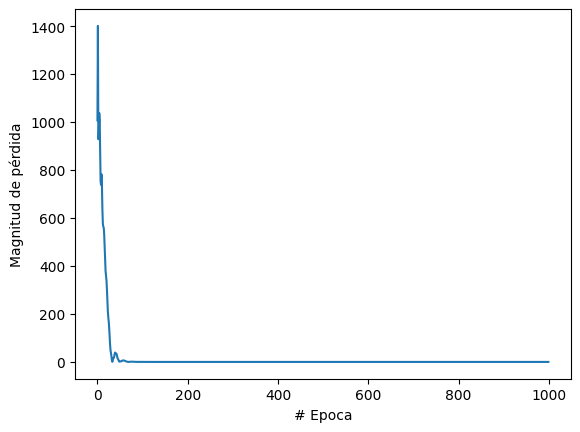

In [ ]:
''' 
Ahora vemos que al ser la red más compleja, el aprendizaje fué mucho más rápido. 
A partir de la vuelta 50-60 ya no aprendió más.
'''
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [17]:
print("Hagamos una predicción!")
entrada = np.array([100.0], dtype=float)
resultado = modelo.predict(entrada)
print("El resultado es "+str(resultado)+" fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
El resultado es [[211.74748]] fahrenheit!


In [ ]:
''' 
Al ser una red más compleja, los resultados obtenidos con estas funciones son
complejos y no nos aportan información relevante para nuestro propósito.
'''
print("Variables internas del modelo")
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.22170998, -0.3233053 ,  0.31591764]], dtype=float32), array([ 3.1145616, -3.131552 ,  3.310445 ], dtype=float32)]
[array([[-0.59968543,  0.17784119,  0.1937858 ],
       [-0.8191957 , -0.5661087 , -1.0014576 ],
       [-0.513047  ,  1.1912656 ,  0.93270046]], dtype=float32), array([-1.7009096,  3.2951488,  3.3003907], dtype=float32)]
[array([[-0.25994736],
       [ 1.4269321 ],
       [ 1.4146714 ]], dtype=float32), array([3.273556], dtype=float32)]
